<div class="span5 alert alert-success">

### **Capstone Two: Data Wrangling** </br>
Author: Wenshan, Liu </br>
Date: 2025-02-23 </br>

#### **Project Objectives:** </br>
1.To scrape the coffee data from the website "https://www.coffeereview.com/advanced-search/". and  Review of each coffee. </br>

2.To organize data and define data.This step includes to merge the coffee brand data with the coffee review data and to define the location of the coffee origin. </br>

3.To clean the data, for example, to convert the price to USD, and drop the data that has null value in 'Score'. </br>

4.To add the geolocation data to the data, for example, to convert the 'Roast location' to Geolocation (latitude and longitude). </br> 

5.To add the weather data to the data, for example, to add the weather data to the data. </br>


**Technique in this project:** </br>
- **Data Collection**   </br>
- **Data Organization** </br>
- **Data Definition** </br>
- **Data Cleaning** </br>
  
</div>


####  Part 1: Data Collection
To scrape the coffee data from the website "https://www.coffeereview.com/advanced-search/" </br>
Step 1 : Need to get the 'Coffe Name' </br>
Step 2 : Use Coffee Name to get the Coffee Review Detail from their specific website</br>
Step 3 : Merge the coffee brand data with the coffee review data</br>


In [1]:


import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

In [2]:
"""
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

df = []
try:
    #for page in range(1, 140): # total page = 139
    for page in range(1, 3): #test
        
        url = f'https://www.coffeereview.com/advanced-search/page/{page}/?keyword=&search=Search+Now&locations=all&score_all=on&score_96_100=on&score_93_95=on&score_90_92=on&score_85_89=on&score_85=on#results'
        headers = {'User-Agent': 'Mozilla/5.0'}  
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        #print(soup)
        #print(soup.prettify()) 
        
        reviews = soup.select('.review-template')  # First, find 'the container' of each review
        
        for review in reviews:
            coffee_name = review.select_one('.entry-content h2 a')
            coffee_brand = review.select_one('.row-3 .col-2 a')
            
            if coffee_name and coffee_brand:
                time.sleep(random.uniform(2, 5))
                
                df.append({
                    'coffee_name': coffee_name.text,
                    'coffee_review_url': coffee_name['href'],
                    'coffee_brand_url': coffee_brand['href']
                })
                
        time.sleep(3)
        
except Exception as e:
    print(f"Error: {e}")

print(df)
df_to_csv = pd.DataFrame(df)
df_to_csv.to_csv('coffee_brand.csv', index=False) # save the data to csv and name it as 'coffee_brand.csv'
"""


'\nimport requests\nfrom bs4 import BeautifulSoup\nimport pandas as pd\nimport time\nimport random\n\ndf = []\ntry:\n    #for page in range(1, 140): # total page = 139\n    for page in range(1, 3): #test\n        \n        url = f\'https://www.coffeereview.com/advanced-search/page/{page}/?keyword=&search=Search+Now&locations=all&score_all=on&score_96_100=on&score_93_95=on&score_90_92=on&score_85_89=on&score_85=on#results\'\n        headers = {\'User-Agent\': \'Mozilla/5.0\'}  \n        response = requests.get(url, headers=headers)\n        soup = BeautifulSoup(response.content, \'html.parser\')\n        #print(soup)\n        #print(soup.prettify()) \n        \n        reviews = soup.select(\'.review-template\')  # First, find \'the container\' of each review\n        \n        for review in reviews:\n            coffee_name = review.select_one(\'.entry-content h2 a\')\n            coffee_brand = review.select_one(\'.row-3 .col-2 a\')\n            \n            if coffee_name and coffee

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
from concurrent.futures import ThreadPoolExecutor
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

def create_session():
    """Create a session with retry mechanism"""
    session = requests.Session()
    retries = Retry(total=3, backoff_factor=1)
    adapter = HTTPAdapter(max_retries=retries)
    session.mount('http://', adapter)
    session.mount('https://', adapter)
    return session

def scrape_page(page):
    """Scrape the data from a single page"""
    session = create_session()
    url = f'https://www.coffeereview.com/advanced-search/page/{page}/?keyword=&search=Search+Now&locations=all&score_all=on&score_96_100=on&score_93_95=on&score_90_92=on&score_85_89=on&score_85=on#results'
    headers = {'User-Agent': 'Mozilla/5.0'}
    
    try:
        response = session.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(response.content, 'html.parser')
        reviews = soup.select('.review-template')
        
        page_data = []
        for review in reviews:
            coffee_name = review.select_one('.entry-content h2 a')
            coffee_brand = review.select_one('.row-3 .col-2 a')
            
            if coffee_name and coffee_brand:
                page_data.append({
                    'coffee_name': coffee_name.text,
                    'coffee_review_url': coffee_name['href'],
                    'coffee_brand_url': coffee_brand['href']
                })
        return page_data
    except Exception as e:
        print(f"Error on page {page}: {e}")
        return []
    finally:
        session.close()

def main():
    df = []
    # Use ThreadPoolExecutor to process in parallel 
    # which means to scrape the data from the website in parallel to speed up the process
    with ThreadPoolExecutor(max_workers=5) as executor:
        # Change back to range(1, 140) for actual scraping
        #pages = range(1, 3)  # test
        pages = range(1, 140)
        results = list(executor.map(scrape_page, pages))
        
        # Merge all the results
        for page_data in results:
            df.extend(page_data)
    
    df_to_csv = pd.DataFrame(df)
    
    # save the data to csv
    df_to_csv.to_csv('coffee_brand.csv', index=False)

if __name__ == "__main__":
    main()

In [4]:
# read the coffee brand data
df_coffee_brand = pd.read_csv('coffee_brand.csv')

# extracte coffee_web_name to new column 'coffee_web_name'  from 'coffee_review_url' 
df_coffee_brand['coffee_web_name'] = df_coffee_brand['coffee_review_url'].apply(lambda x: x.split('review/')[-1].rstrip('/'))


print(df_coffee_brand.head())

# save it back to csv
df_coffee_brand.to_csv('coffee_brand.csv', index=False)

                                 coffee_name  \
0                         Mexico Alva Flores   
1           Mexico Olegario Finca La Cienaga   
2              Mexico Juan Carlos Nuevo Leon   
3                          Anniversary Blend   
4  Ethiopia Natural Sidama Blue Donkey Lot 2   

                                   coffee_review_url  \
0  https://www.coffeereview.com/review/mexico-alv...   
1  https://www.coffeereview.com/review/mexico-ole...   
2  https://www.coffeereview.com/review/mexico-jua...   
3  https://www.coffeereview.com/review/anniversar...   
4  https://www.coffeereview.com/review/ethiopia-n...   

                                    coffee_brand_url  \
0  https://utopiancoffee.com/collections/coffee?f...   
1  https://utopiancoffee.com/collections/coffee?f...   
2  https://utopiancoffee.com/collections/coffee?f...   
3                    https://www.equatorcoffees.com/   
4                    http://www.kakalovecafe.com.tw/   

                             coffee_w

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
from concurrent.futures import ThreadPoolExecutor
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

coffee_review_data = []

def create_session_with_retries():
    # using session to avoid the timeout error
    session = requests.Session()
    retries = Retry(
        total=3,  # total retry times
        backoff_factor=1,
        status_forcelist=[500, 502, 503, 504],
        allowed_methods=["GET"]
    )
    adapter = HTTPAdapter(max_retries=retries)
    session.mount('http://', adapter)
    session.mount('https://', adapter)
    return session

def scrape_detailed_review(review_url):
    """
    scrape the detailed review from the review url
    """
    session = create_session_with_retries()
    headers = {'User-Agent': 'Mozilla/5.0'}
    
    try:
        response = session.get(
            review_url,
            headers=headers,
            timeout=(10, 30)  # shorten the timeout time
        )
        
        if response.status_code != 200:
            return None
            
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # extract the data
        roaster = soup.find('p', class_='review-roaster')
        roaster = roaster.text.strip() if roaster else 'No data'
        
        title_element = soup.find(['h1', 'h2'], class_=['review-title', 'entry-title'])
        title = title_element.text.strip() if title_element else 'No Title'
        
        score_element = soup.find('span', class_='review-template-rating')
        score = score_element.text.strip() if score_element else 'No data'
        
        # extract the table data
        attributes = {}
        for table in soup.find_all('table'):
            for row in table.find_all('tr'):
                cells = row.find_all('td')
                if len(cells) == 2:
                    key = cells[0].text.strip().rstrip(':')
                    value = cells[1].text.strip()
                    attributes[key] = value
        
        return {
            'title': title,
            'roaster': roaster,
            'score': score,
            **attributes
        }
        
    except Exception as e:
        print(f"Error scraping {review_url}: {e}")
        return None
    finally:
        session.close()

def process_reviews_batch(urls, batch_size):
    """
    process the reviews batch in parallel
    if the batch size is 10, which means to scrape the reviews in parallel 10 reviews pages at a time
    """
    with ThreadPoolExecutor(max_workers=batch_size) as executor:
        results = list(executor.map(scrape_detailed_review, urls))
    return [r for r in results if r is not None]


def main():

    # read the review url
    df_coffee_brand = pd.read_csv('coffee_brand.csv')
    review_links = df_coffee_brand['coffee_review_url'].tolist()
    
    # process the reviews batch in parallel
    batch_size = 10  # the number of reviews pages to process in parallel
    all_reviews = []
    
    for i in range(0, len(review_links), batch_size):
        batch_urls = review_links[i:i + batch_size]
        batch_results = process_reviews_batch(batch_urls, batch_size)
        all_reviews.extend(batch_results)
        
        # save the data every batch
        df_coffee_review_data = pd.DataFrame(all_reviews)
        df_coffee_review_data.to_csv('coffee_review_data.csv', index=False)
        
        # pause for a while to avoid the request too frequent
        time.sleep(random.uniform(1, 2))
        
        # show the progress
        print(f"Processed {i + len(batch_urls)}/{len(review_links)} reviews")

if __name__ == "__main__":
    main()

Processed 10/1484 reviews
Processed 20/1484 reviews
Processed 30/1484 reviews
Processed 40/1484 reviews
Processed 50/1484 reviews
Processed 60/1484 reviews
Processed 70/1484 reviews
Processed 80/1484 reviews
Processed 90/1484 reviews
Processed 100/1484 reviews
Processed 110/1484 reviews
Processed 120/1484 reviews
Processed 130/1484 reviews
Processed 140/1484 reviews
Processed 150/1484 reviews
Processed 160/1484 reviews
Processed 170/1484 reviews
Processed 180/1484 reviews
Processed 190/1484 reviews
Processed 200/1484 reviews
Processed 210/1484 reviews
Processed 220/1484 reviews
Processed 230/1484 reviews
Processed 240/1484 reviews
Processed 250/1484 reviews
Processed 260/1484 reviews
Processed 270/1484 reviews
Processed 280/1484 reviews
Processed 290/1484 reviews
Processed 300/1484 reviews
Processed 310/1484 reviews
Processed 320/1484 reviews
Processed 330/1484 reviews
Processed 340/1484 reviews
Processed 350/1484 reviews
Processed 360/1484 reviews
Processed 370/1484 reviews
Processed 

####  Part2: Data Organization
 After scraping, we already got the coffee review data. Secondly, We need to merge the coffee brand data with the coffee review data.

In [ ]:
# read the coffee review data
df_coffee_review_data = pd.read_csv('coffee_review_data.csv')

# read the coffee brand data
df_coffee_brand = pd.read_csv('coffee_brand.csv')

# merge two dataframe
df_merged = pd.merge(
    df_coffee_review_data, 
    df_coffee_brand[['coffee_name', 'coffee_review_url', 'coffee_brand_url']], 
    left_on='title',  # the column in df_coffee_review_data
    right_on='coffee_name',  # the column in df_coffee_brand
    how='left'
)
# print the merged dataframe
print(df_merged.head())



                              title          roaster  score  \
0                Mexico Alva Flores   Utopian Coffee     94   
1  Mexico Olegario Finca La Cienaga   Utopian Coffee     93   
2     Mexico Juan Carlos Nuevo Leon   Utopian Coffee     93   
3                 Anniversary Blend  Equator Coffees     93   
4                 Anniversary Blend  Equator Coffees     93   

         Roaster Location                                      Coffee Origin  \
0     Fort Wayne, Indiana             Santa Cruz, Ozolotepec, Oaxaca, Mexico   
1     Fort Wayne, Indiana                  El Limon, Mixteca, Oaxaca, Mexico   
2     Fort Wayne, Indiana  Pugchen Mumuntic, San Juan Chamula, Chiapas, M...   
3  San Rafael, California                         Indonesia; Kenya; Colombia   
4  San Rafael, California                         Indonesia; Kenya; Colombia   

    Roast Level Agtron        Est. Price Review Date  Aroma  \
0  Medium-Light  54/72  $18.00/12 ounces  March 2025    9.0   
1  Medium-Ligh

#### Part3: Data Definition 
Object :to define the data, we need to find the Geographic Location of the `Coffee Origin`. </br>


Step 4 : To check the `Coffee Origin` is in which country, if it is not in the country, we need to find the country of the coffee origin.</br>

Step 5 : To classify the coffee origin into specific geographical regions</br>


In [7]:
#### In new dataframe, we had already merged two dataframe. Then, We have to find the Geographic Location of the `Coffee Origin`.
#### To check the `Coffee Origin` is in which country, if it is not in the country, we need to find the country of the `Coffee Origin`.


# Take a look at the unique value of 'Coffee Origin'
df_merged['Coffee Origin'].unique()
df_merged['Coffee Origin'].value_counts()


Coffee Origin
Guji Zone, Oromia Region, southern Ethiopia                       60
Holualoa, North Kona growing district, “Big Island” of Hawai’i    58
Nyeri growing region, south-central Kenya                         55
Sidamo growing region, southern Ethiopia                          35
Antigua, Guatemala                                                34
                                                                  ..
Phu Khaa, Nan Province, Thailand                                   1
El Carmen Cautivo, Tabaconas, Cajamarca, Peru                      1
Cubulco, Guatemala                                                 1
Mogiana growing region, Sao Paulo State, Brazil                    1
Turrialba, Costa Rica                                              1
Name: count, Length: 693, dtype: int64

In [8]:
# From the result, 
# we could see that there are some coffee from few locations. 
# Aslo, there are no logical rules to classify the coffee origin, 
# so try to use fuzzy matching and regular expression to match the region.

# For example: 
# 1) Brazil; Guatemala; Ethiopia  (country ; country ; country)
# 2) Mexico, Papua New Guinea   (country , country)
# 3) Kiambu County, south-central Kenya        (county name, country)



# Step 1: Identify single-origin coffees
# Add a new column [is_blend]in df_merged to indicate whether it's single-origin or blend (0:single-origin, 1:blend)

# Step 2: Region Classification Logic:
# Create binary indicators (0 or 1) for these columns:
# - region_africa_arabia
# - region_caribbean
# - region_central_america
# - region_hawaii
# - region_asia_pacific

#Step 3: To classify the coffee origin
# For single-origin coffees (separated by ','): Direct classification
# For blended coffees (separated by ';'): 

# - First identify all origin regions (2 or 3)
# - Check each region against the 5 geographical areas
# - Mark '1' for matching regions

# Step 4: Display results


In [9]:
# import regular expressions package
import re

def create_region_patterns():
    """Create region matching patterns

    Args:
        None
        
    Returns:
        dict: A dictionary containing region patterns and associated keywords   
    
    Process:
        if the country is in the 'countries' list, return True
        otherwise, use the keywords to check if the country matches the pattern (fuzzy matching and regular expression)

    """



    regions = {
        'africa_arabia': {
            'countries': ['Ethiopia', 'Kenya', 'Tanzania', 'Rwanda', 'Uganda', 'Yemen', 'Burundi', 'Congo'],
            'keywords': ['ethiopia', 'ethiopian', 'yirgacheffe', 'sidamo', 'guji',
                         'kenya', 'kenyan', 'nyeri', 'kiambu',
                         'tanzania', 'tanzanian',
                         'rwanda', 'rwandan',
                         'uganda', 'ugandan',
                         'yemen', 'yemeni',
                         'burundi', 'burundian',
                         'congo', 'congolese']
        },
        'caribbean': {
            'countries': ['Jamaica', 'Haiti', 'Dominican Republic', 'Cuba'],
            'keywords': ['jamaica', 'jamaican', 'blue mountain',
                         'haiti', 'haitian',
                         'dominican', 'dominica',
                         'cuba', 'cuban']
        },
        'central_america': {
            'countries': ['Guatemala', 'Costa Rica', 'Honduras', 'El Salvador', 'Nicaragua', 'Panama', 'Mexico'],
            'keywords': ['guatemala', 'guatemalan', 'antigua', 'huehuetenango', 'atitlan',
                         'costa rica', 'costa rican', 'tarrazu',
                         'honduras', 'honduran',
                         'el salvador', 'salvadoran',
                         'nicaragua', 'nicaraguan',
                         'panama', 'panamanian',
                         'mexico', 'mexican', 'chiapas', 'oaxaca']
        },
        'hawaii': {
            'countries': ['Hawaii', 'Kona', 'Maui', 'Hawai'],
            'keywords': ['hawaii', 'hawaiian', 'kona', 'maui', 'big island']
        },
        'asia_pacific': {
            'countries': ['Indonesia', 'Papua New Guinea', 'Taiwan', 'Vietnam', 'Thailand', 'India', 'Myanmar'],
            'keywords': ['indonesia', 'indonesian', 'sumatra', 'sulawesi', 'java',
                         'papua', 'new guinea',
                         'taiwan', 'taiwanese', 'alishan',
                         'vietnam', 'vietnamese',
                         'thailand', 'thai',
                         'india', 'indian', 'malabar',
                         'myanmar', 'burmese']
        }
    }
    # to convert the keywords to patterns
    for region, info in regions.items():
        info['patterns'] = [r'|'.join(info['keywords'])]
    return regions


def is_in_region(place, region_info):
    """to check if the place is in the region"""
    if pd.isna(place):
        return False
        
    place = str(place).lower()
    
    # 2 Ways to mapping:
    # a) Direct matching -> check the exact country name
    if any(country.lower() in place for country in region_info['countries']):
        return True
    
    # b) Fuzzy matching -> use the pattern to check if the country matches the pattern
    return any(re.search(pattern, place, re.IGNORECASE) 
              for pattern in region_info['patterns'])


def classify_region(origin):
    """Classify coffee origins into specific geographical regions
    
    Args:
        origin (str): Coffee origin string, can be single origin or blend
                     Format examples: 
                     - Single origin: "Ethiopia, Yirgacheffe"
                     - Blend: "Ethiopia; Colombia"
    
    Returns:
        dict: Dictionary containing binary indicators for each region:
            {
                'region_africa_arabia': 0 or 1,
                'region_caribbean': 0 or 1,
                'region_central_america': 0 or 1,
                'region_hawaii': 0 or 1,
                'region_asia_pacific': 0 or 1,
                'is_blend': 0 or 1  # 1 if origin contains ';'
            }
    """
    
    if pd.isna(origin):
        return {
            'region_africa_arabia': 0,
            'region_caribbean': 0,
            'region_central_america': 0,
            'region_hawaii': 0,
            'region_asia_pacific': 0,
            'is_blend': 0
        }
    
    # Use the function to get the region matching 
    regions = create_region_patterns()
    
    # To check if the origin is blend 
    is_blend = 1 if ';' in str(origin) else 0
    
    # Use ';' or ',' to split the origin
    if is_blend:
        origins = [o.strip() for o in str(origin).split(';')]
    else:
        origins = [o.strip() for o in str(origin).split(',')]
    
    # Initialize 
    result = {
        'region_africa_arabia': 0,
        'region_caribbean': 0,
        'region_central_america': 0,
        'region_hawaii': 0,
        'region_asia_pacific': 0,
        'is_blend': is_blend
    }
    
    # To check each origin in the list
    for place in origins:
        if is_in_region(place, regions['africa_arabia']):
            result['region_africa_arabia'] = 1
        if is_in_region(place, regions['caribbean']):
            result['region_caribbean'] = 1
        if is_in_region(place, regions['central_america']):
            result['region_central_america'] = 1
        if is_in_region(place, regions['hawaii']):
            result['region_hawaii'] = 1
        if is_in_region(place, regions['asia_pacific']):
            result['region_asia_pacific'] = 1
    
    return result


# Apply the classify_region to DataFrame
results = df_merged['Coffee Origin'].apply(classify_region)

# Add the results to DataFrame
for key in ['region_africa_arabia', 'region_caribbean', 'region_central_america', 
           'region_hawaii', 'region_asia_pacific', 'is_blend']:
    df_merged[key] = results.apply(lambda x: x[key])

# Print the results
print(f"\Result:")
print(df_merged[['Coffee Origin', 'is_blend', 'region_africa_arabia', 
                'region_caribbean', 'region_central_america', 
                'region_hawaii', 'region_asia_pacific']].head(10))

# rename the dataframe to df_merged_with_regions
df_merged_with_regions = df_merged
# Save the results to csv
#df_merged.to_csv('coffee_data_with_regions.csv', index=False)

\Result:
                                       Coffee Origin  is_blend  \
0             Santa Cruz, Ozolotepec, Oaxaca, Mexico         0   
1                  El Limon, Mixteca, Oaxaca, Mexico         0   
2  Pugchen Mumuntic, San Juan Chamula, Chiapas, M...         0   
3                         Indonesia; Kenya; Colombia         1   
4                         Indonesia; Kenya; Colombia         1   
5           Sidamo growing region, southern Ethiopia         0   
6   Sabanilla de Alajuela growing region, Costa Rica         0   
7               Acatenango, Chimaltenango, Guatemala         0   
8               Acatenango, Chimaltenango, Guatemala         0   
9                                Ethiopia; Guatemala         1   

   region_africa_arabia  region_caribbean  region_central_america  \
0                     0                 0                       1   
1                     0                 0                       1   
2                     0                 0                

#### Part4: Data Cleaning
Object : to clean the data, we need to convert the price to USD, and drop the data that has null value in 'Score'.</br>
Step 6 : Convert the price to USD</br>
Step 7 : Drop the data that has null value in 'Score'</br>


In [10]:
def convert_price_to_usd(price_str):
    """Convert price string to USD format"""
    if pd.isna(price_str):
        return None
        
    #print the original price
    #print(f"Processing price: {price_str}")
    
    try:
        # Convert to string and remove whitespace
        price_str = str(price_str).strip()
        
        # to split the price and unit
        parts = price_str.split('/')
        price_part = parts[0]
        unit_part = parts[1] if len(parts) > 1 else None

        # to handle the NT$ format
        if 'NT' in price_str:
            # to split the price and unit
            #parts = price_str.split('/')
            amount = float(price_part.replace('NT$ $', '').replace('NT$', '')
                         .replace('NT $', '').replace('$NT $', '')
                         .replace('NT', '').replace(',', '').replace('$', ''))
            # to convert to USD (NT$ to USD rate is about 0.03)
            amount = amount * 0.03
            '''
            # to handle the different NT$ format
            price_part = parts[0]
            price_part = price_part.replace('NT$ $', '').replace(',', '').replace('$', '')
            price_part = price_part.replace('NT$', '').replace(',', '').replace('$', '')
            price_part = price_part.replace('NT $', '').replace(',', '').replace('$', '')
            price_part = price_part.replace('$NT $', '').replace(',', '').replace('$', '')
            price_part = price_part.replace('NT', '').replace(',', '').replace('$', '')

            amount = float(price_part)
            # if there is unit, keep the unit
            #if len(parts) > 1:
            #    return f"${amount * 0.03:.1f}/{parts[1]}"
            #return f"${amount * 0.03:.1f}"
            amount = float(price_part.replace('$', '').replace(',', ''))
            '''
        # if the price is already in USD format or other format, return the price
        else:
            amount = float(price_part.replace('$', '').replace(',', ''))

        
         # to format the output
        if unit_part:
            print(f"$Final change: {amount:.2f}/{unit_part}")
            return f"${amount:.2f}/{unit_part}"
        else:
            print(f"$Final change: {amount:.2f}")
            return f"${amount:.2f}"
        
        

    except Exception as e:
        # print the detailed error information
        print(f"Error processing price: {price_str}")
        print(f"Error type: {type(e)}")
        print(f"Error message: {str(e)}")
        return None

# apply the convert function and check which row has problem
for index, row in df_merged_with_regions.iterrows():
    price = row['Est. Price']
    try:
        converted_price = convert_price_to_usd(price)
        if converted_price is None:
            print(f"\nProblem at row {index}:")
            print(f"Original price: {price}")
    except Exception as e:
        print(f"\nError at row {index}:")
        print(f"Original price: {price}")
        print(f"Error: {str(e)}")

# then apply the convert function
df_merged_with_regions['Est. Price USD'] = df_merged_with_regions['Est. Price'].apply(convert_price_to_usd)


df_merged_with_regions_usd = df_merged_with_regions

# save to csv
#data.to_csv('coffee_data_with_usd_prices.csv', index=False)

$Final change: 18.00/12 ounces
$Final change: 18.00/12 ounces
$Final change: 20.00/12 ounces
$Final change: 22.00/12 ounces
$Final change: 22.00/12 ounces
$Final change: 10.50/8 ounces
$Final change: 24.00/8 ounces
$Final change: 12.60/4 ounces
$Final change: 12.60/4 ounces
$Final change: 7.80/8 ounces
$Final change: 7.80/8 ounces
$Final change: 6.90/8 ounces
$Final change: 18.00/12 ounces
$Final change: 19.00/12 ounces
$Final change: 38.00/8 ounces
$Final change: 42.00/8 ounces
$Final change: 22.00/8 ounces
$Final change: 50.00/4 ounces
$Final change: 50.00/4 ounces
$Final change: 21.00/12 ounces
$Final change: 21.00/12 ounces
$Final change: 20.00/12 ounces
$Final change: 20.00/12 ounces
$Final change: 21.00/12 ounces
$Final change: 25.00/12 ounces
$Final change: 22.00/12 ounces
$Final change: 35.00/12 ounces
$Final change: 30.00/12 ounces
$Final change: 22.00/12 ounces
$Final change: 24.00/227 grams
$Final change: 22.00/12 ounces
$Final change: 11.70/227 grams
$Final change: 11.70/22

Step 8 : Drop the data that has null value in [Aroma, Body, Flavor, Aftertaste]</br>
Step 9 : Save the data to csv</br>

In [11]:
# Drop the data that has null value in 'Score'
data = df_merged_with_regions_usd[df_merged_with_regions_usd['score'].notna()]


# Drop the data that has null value in [Aroma, Body, Flavor, Aftertaste]
data = data[data['Aroma'].notna()]
data = data[data['Body'].notna()]
data = data[data['Flavor'].notna()]
data = data[data['Aftertaste'].notna()]

data_cleaned = data
# save the data to csv
#data.to_csv('coffee_data_cleaned.csv', index=False)

data_cleaned.describe()



,score,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,With Milk,Acidity,region_africa_arabia,region_caribbean,region_central_america,region_hawaii,region_asia_pacific,is_blend
count,1783.000000,1783.000000,1592.000000,1783.000000,1783.000000,1783.000000,188.000000,4.0,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000
mean,93.582726,8.898486,8.668342,8.719574,9.025799,8.238362,8.957447,9.0,0.401570,0.001122,0.282109,0.068424,0.081884,0.070667
std,1.453265,0.351864,0.510656,0.461653,0.323780,0.513398,0.471994,0.0,0.490353,0.033482,0.450152,0.252543,0.274266,0.256340
min,85.000000,7.000000,7.000000,7.000000,8.000000,7.000000,5.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,9.000000,8.000000,8.000000,9.000000,8.000000,9.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,95.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Part5: Add Geolocation data
Object : to add the geolocation data, we need to convert the 'Roast location' to Geolocation (latitude and longitude).</br>
Method : use the geopy' library to get the geolocation data.

In [12]:
#!pip install geopy

In [13]:
# Covert 'Roast location' to Geolocation (latitude and longitude)
#df_cleaned = pd.read_csv('coffee_data_cleaned.csv')

import geopy
from geopy.geocoders import Nominatim


def geocode_with_retry(address, max_retries=2):
    for attempt in range(max_retries):
        try:
            time.sleep(random.uniform(1, 2)) # pause for a while to avoid the request too frequent
            location = geolocator.geocode(address, timeout=20) 
            if location:
                return location.latitude, location.longitude
        except Exception as e:
            if attempt == max_retries - 1:  # the last attempt
                print(f"The address '{address}' is not found the latitude and longitude: {e}")
            continue
    return None, None


# use the retry mechanism to geocode
geolocator = Nominatim(user_agent="my_coffee_project")
for index, row in df_merged_with_regions_usd.iterrows():
    lat, lon = geocode_with_retry(row['Roaster Location'])
    df_merged_with_regions_usd.at[index, 'Latitude'] = lat
    df_merged_with_regions_usd.at[index, 'Longitude'] = lon

print(df_merged_with_regions_usd.head())
df_clean = df_merged_with_regions_usd

                              title          roaster  score  \
0                Mexico Alva Flores   Utopian Coffee     94   
1  Mexico Olegario Finca La Cienaga   Utopian Coffee     93   
2     Mexico Juan Carlos Nuevo Leon   Utopian Coffee     93   
3                 Anniversary Blend  Equator Coffees     93   
4                 Anniversary Blend  Equator Coffees     93   

         Roaster Location                                      Coffee Origin  \
0     Fort Wayne, Indiana             Santa Cruz, Ozolotepec, Oaxaca, Mexico   
1     Fort Wayne, Indiana                  El Limon, Mixteca, Oaxaca, Mexico   
2     Fort Wayne, Indiana  Pugchen Mumuntic, San Juan Chamula, Chiapas, M...   
3  San Rafael, California                         Indonesia; Kenya; Colombia   
4  San Rafael, California                         Indonesia; Kenya; Colombia   

    Roast Level Agtron        Est. Price Review Date  Aroma  ...  \
0  Medium-Light  54/72  $18.00/12 ounces  March 2025    9.0  ...   
1  M

#### Part6: Add Weather data
Object : to add the weather data, we need to get the weather data based on the geolocation data.</br>
Method : use the OpenWeatherMap API to get the weather data and calculate the average temperature in January and the average temperature in July, and the sum of precipitation in January and the sum of precipitation in July.




In [14]:
# Based on the location, to get the weather data

#df_cleaned = pd.read_csv('coffee_data_with_location.csv')

# to get the unique latitude and longitude combination, since the latitude and longitude is the same, 
# so we can use the drop_duplicates to get the unique combination
df_weather = df_clean[['Latitude', 'Longitude']].drop_duplicates()

print(df_weather)


       Latitude   Longitude
0     41.079990  -85.138601
3     37.974779 -122.531669
5     23.481109  120.453541
6     36.915706  -80.387689
12    40.693861  -89.589101
16    43.074761  -89.383761
17          NaN         NaN
27    39.049011  -95.677556
28    32.717420 -117.162772
29    25.037520  121.563680
35    24.751954  121.753334
57    37.276948 -107.876600
60    24.163162  120.647828
68    37.784021  -79.442816
69    22.755367  121.150600
86    43.002011  -75.976863
104   14.556781  -90.733735
112   39.739236 -104.984862
121   42.241134  -88.316197
141   40.745532  -73.948499
142   43.646067 -108.212043
143   45.662387 -110.561590
154   35.227209  -80.843083
166   42.307348  -73.250491
171   26.960937  -80.089205
173   34.693757  135.501454
174   47.045102 -122.895008
176   19.707373 -155.081580
180   51.489334   -0.144055
181   45.677416  -91.969990
186   24.992999  121.301000
190   19.629470 -155.916855
208   25.038481  121.562009
217   41.942666  -70.761859
221   35.159518  -84

In [15]:
# Use API to get the weather data 
# Temperature: only calculate the average temperature in January and the average temperature in July
# Precipitation: only calculate the sum of precipitation in January and the sum of precipitation in July
def get_weather_data_january_avg_temp(latitude, longitude):
    """Get weather data from OpenWeatherMap API
    
    Args:
        latitude (float): Latitude of the location
        longitude (float): Longitude of the location

    Returns:
        float: Average temperature in January
        float: Sum of precipitation in January
    """

    lat, lon = latitude, longitude
    url = f"https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}&start_date=2023-01-01&end_date=2023-01-31&daily=temperature_2m_mean,precipitation_sum"
    response = requests.get(url)
    data = response.json()

    # to calculate the average temperature in January
    january_avg_temp = data['daily']['temperature_2m_mean'][0]
    january_precipitation = data['daily']['precipitation_sum'][0]   
    
    return january_avg_temp, january_precipitation


# test the function
#get_weather_data_january_avg_temp(52.52, 13.42)


def get_weather_data_july_avg_temp(latitude, longitude):
    """Get weather data from OpenWeatherMap API
    
    Args:
        latitude (float): Latitude of the location
        longitude (float): Longitude of the location

    Returns:
        float: Average temperature in January
        float: Sum of precipitation in January
    """

    lat, lon = latitude, longitude
    url = f"https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}&start_date=2023-07-01&end_date=2023-07-31&daily=temperature_2m_mean,precipitation_sum"
    response = requests.get(url)
    data = response.json()

    # to calculate the average temperature in July
    july_avg_temp = data['daily']['temperature_2m_mean'][0]
    july_precipitation = data['daily']['precipitation_sum'][0]   
    
    return july_avg_temp, july_precipitation

# test the function 
print("==test the function:==")
print(f"july weather data: {get_weather_data_july_avg_temp(52.52, 13.42)}")
print(f"january weather data: {get_weather_data_january_avg_temp(52.52, 13.42)}")


==test the function:==
july weather data: (19.8, 2.3)
january weather data: (13.9, 0.3)


In [16]:

# to get weather data for each location(dataframe df_weather)
for index, row in df_weather.iterrows():
    try:
        #to check if the latitude and longitude is valid
        if pd.isna(row['Latitude']) or pd.isna(row['Longitude']):
            print(f"Skip row {index}: Invalid coordinates")
            continue
            
        # sleep for 1 second to avoid too many requests
        time.sleep(random.uniform(1, 2))
        
        # print the current processing coordinates, for debugging
        #print(f"Processing row {index}: Lat={row['Latitude']}, Lon={row['Longitude']}")
        
        january_avg_temp, january_precipitation = get_weather_data_january_avg_temp(
            row['Latitude'], 
            row['Longitude']
        )
        
        # add the result to the dataframe
        df_weather.at[index, 'January_Avg_Temp'] = january_avg_temp
        df_weather.at[index, 'January_Precipitation'] = january_precipitation
        
       
        # to get the July weather data
        july_avg_temp, july_precipitation = get_weather_data_july_avg_temp(
            row['Latitude'], 
            row['Longitude']
        )
        df_weather.at[index, 'July_Avg_Temp'] = july_avg_temp
        df_weather.at[index, 'July_Precipitation'] = july_precipitation
        
       
    except Exception as e:
        # print the detailed error information
        print(f"Error at row {index}:") 

print(df_weather)

Skip row 17: Invalid coordinates
       Latitude   Longitude  January_Avg_Temp  January_Precipitation  \
0     41.079990  -85.138601               4.1                    0.0   
3     37.974779 -122.531669              10.3                    4.9   
5     23.481109  120.453541              18.0                    1.6   
6     36.915706  -80.387689               9.8                    0.1   
12    40.693861  -89.589101               5.0                    2.3   
16    43.074761  -89.383761               1.2                    1.3   
17          NaN         NaN               NaN                    NaN   
27    39.049011  -95.677556               4.2                    0.0   
28    32.717420 -117.162772              14.1                   24.0   
29    25.037520  121.563680              18.8                    0.5   
35    24.751954  121.753334              18.7                   30.0   
57    37.276948 -107.876600               2.0                    5.6   
60    24.163162  120.647828    

#### Part7: Combine the weather data with the coffee data
Object : to combine the weather data with the coffee data, we need to merge the weather data with the coffee data based on the latitude and longitude.


In [17]:
# combine the weather data with the coffee data (df_cleane)

# merge the weather data with the coffee data
df_cleaned = pd.merge(df_clean, df_weather, on=['Latitude', 'Longitude'], how='left')

print(df_cleaned)

df_cleaned.describe()

# save the data to csv
df_cleaned.to_csv('coffee_data_final_cleaned.csv', index=False)


                                                  title              roaster  \
0                                    Mexico Alva Flores       Utopian Coffee   
1                      Mexico Olegario Finca La Cienaga       Utopian Coffee   
2                         Mexico Juan Carlos Nuevo Leon       Utopian Coffee   
3                                     Anniversary Blend      Equator Coffees   
4                                     Anniversary Blend      Equator Coffees   
...                                                 ...                  ...   
1789                              Sumatra Pantan Musara    Paradise Roasters   
1790                              Sumatra Pantan Musara    Paradise Roasters   
1791              Sumatra Gayo G1 Triple-Picked Lot 005        Kakalove Cafe   
1792  Kakalove Taiwan Natural SL34 Alishan Ching-Ye ...        Kakalove Cafe   
1793                             Nano Genji #4 Espresso  JBC Coffee Roasters   

      score        Roaster Location  \


#### Part8: Check the range of the data
Object : to check the range of the data, we need to check the range of the score and the price.


In [18]:
# to check the range of the socre
df_cleaned['score'].describe()

count    1794.000000
mean       93.580825
std         1.451729
min        85.000000
25%        93.000000
50%        94.000000
75%        94.000000
max        98.000000
Name: score, dtype: float64

<Axes: >

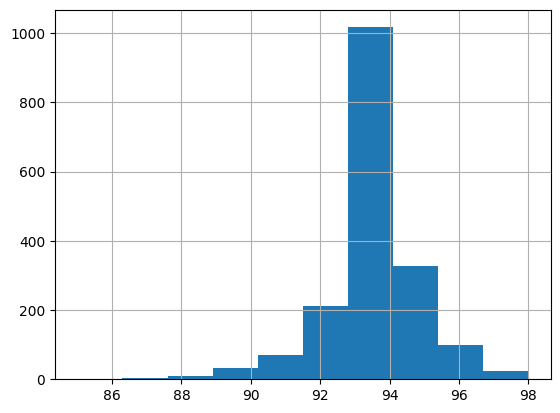

In [19]:
# histogram of the score
df_cleaned['score'].hist()